In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
PPA = gpd.read_file("PERMIT_PARKING_AREA.shp")
PPA.head()

AREA_NAME  RID                                           geometry
0       12A    1  POLYGON ((305951.224 4836716.8539, 306304.4861...
1        3C    2  POLYGON ((307007.9292 4837475, 307059.5326 483...
2       13N    3  POLYGON ((307703.9323 4837862.872, 307660.2556...
3       13L    4  POLYGON ((308203.9008 4839125.69, 308219.3758 ...
4        3B    5  POLYGON ((307904.4235 4837921.9529, 307973.590...

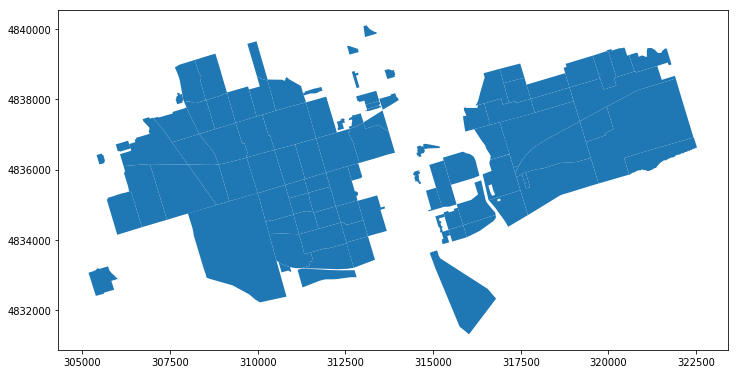

In [5]:
fig, ax = plt.subplots(figsize = (12,12))
PPA.plot(ax=ax)

In [3]:
import mplleaflet
from shapely.geometry import Polygon
import folium

In [6]:
pyproj.pyproj_datadir

'C:/Users/fff/Anaconda3\\share\\proj'

In [7]:
m = folium.Map([43.6798, -79.4252], zoom_start=15, tiles='cartodbpositron')
folium.GeoJson(PPA).add_to(m)
folium.LatLngPopup().add_to(m)
m

RuntimeError: b'no arguments in initialization list'

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from folium.plugins import HeatMap
from pandas.io.json import json_normalize

In [3]:
geotab = pd.read_csv("SearchingForParking_Toronto.csv")
geotab.head()

Geohash  Latitude_SW  Longitude_SW  Latitude_NE  Longitude_NE  Latitude  \
0  dpz2nth     43.62122     -79.51355     43.62259     -79.51218  43.62203   
1  dpz2pnp     43.62671     -79.48746     43.62808     -79.48608  43.62777   
2  dpz9k90     43.81897     -79.25537     43.82034     -79.25400  43.81917   
3  dpz95wt     43.80524     -79.29245     43.80661     -79.29108  43.80573   
4  dpz2jsn     43.61572     -79.55475     43.61710     -79.55338  43.61657   

   Longitude     City  County    State   ...    \
0  -79.51279  Toronto     NaN  Ontario   ...     
1  -79.48653  Toronto     NaN  Ontario   ...     
2  -79.25500  Toronto     NaN  Ontario   ...     
3  -79.29157  Toronto     NaN  Ontario   ...     
4  -79.55445  Toronto     NaN  Ontario   ...     

                                  HourlyDistribution  \
0  {"00": null, "01": 0, "02": null, "03": null, ...   
1  {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0, ...   
2  {"00": 0, "01": 0, "02": null, "03": 0, "04": ...   
3  {"00": 0.0478, "01": 0, "02": 0.0478, "03": 0....   
4  {"00": 0.0667, "01": null, "02": null, "03": 0...   

                                     SearchingByHour  PercentCar  PercentMPV  \
0  {"00": null, "01": 0, "02": null, "03": null, ...      0.0000      0.1563   
1  {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0, ...      0.0000      0.0000   
2  {"00": 0, "01": 0, "02": null, "03": 0, "04": ...      0.0000      0.0250   
3  {"00": 0.3333, "01": 0, "02": 0.1667, "03": 0....      0.1186      0.2542   
4  {"00": 0.4, "01": null, "02": null, "03": 0, "...      0.0270      0.0811   

   PercentLDT  PercentMDT  PercentHDT  PercentOther  UpdateDate Version  
0      0.4375      0.0938      0.2188        0.0938  2019-01-02     2.1  
1      0.0172      0.0000      0.8621        0.1207  2019-01-02     2.1  
2      0.6000      0.0500      0.3250        0.0000  2019-01-02     2.1  
3      0.2712      0.0000      0.3559        0.0000  2019-01-02     2.1  
4      0.5946      0.0270      0.1622        0.1081  2019-01-02     2.1  

[5 rows x 29 columns]

In [4]:
geotab.drop(geotab.columns[[7,8,9,10,11,27,28]], axis=1, inplace=True)
geotab.head()

Geohash  Latitude_SW  Longitude_SW  Latitude_NE  Longitude_NE  Latitude  \
0  dpz2nth     43.62122     -79.51355     43.62259     -79.51218  43.62203   
1  dpz2pnp     43.62671     -79.48746     43.62808     -79.48608  43.62777   
2  dpz9k90     43.81897     -79.25537     43.82034     -79.25400  43.81917   
3  dpz95wt     43.80524     -79.29245     43.80661     -79.29108  43.80573   
4  dpz2jsn     43.61572     -79.55475     43.61710     -79.55338  43.61657   

   Longitude  AvgTimeToPark  AvgTimeToParkRatio  TotalSearching      ...       \
0  -79.51279         4.2656              1.4406              32      ...        
1  -79.48653         6.5115              1.1102              58      ...        
2  -79.25500         4.4358              1.3241              40      ...        
3  -79.29157         3.1831              1.0765              59      ...        
4  -79.55445         6.5225              1.6573              37      ...        

   AvgTotalGeohashes                               CirclingDistribution  \
0            11.2500  {"dpz2ntm":0.1646, "dpz2ntj":0.0556, "dpz2nt7"...   
1             9.5172  {"dpz2pq0":0.1145, "dpz2pnp":0.2925, "dpz2pmb"...   
2             7.2000  {"dpz9k90":0.3395, "dpz9k8c":0.0621, "dpz9k3p"...   
3             7.4407  {"dpz95wv":0.0873, "dpz95ws":0.0597, "dpz95wq"...   
4             9.2973  {"dpz2jez":0.215, "dpz2jsr":0.0392, "dpz2jsj":...   

                                  HourlyDistribution  \
0  {"00": null, "01": 0, "02": null, "03": null, ...   
1  {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0, ...   
2  {"00": 0, "01": 0, "02": null, "03": 0, "04": ...   
3  {"00": 0.0478, "01": 0, "02": 0.0478, "03": 0....   
4  {"00": 0.0667, "01": null, "02": null, "03": 0...   

                                     SearchingByHour PercentCar PercentMPV  \
0  {"00": null, "01": 0, "02": null, "03": null, ...     0.0000     0.1563   
1  {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0, ...     0.0000     0.0000   
2  {"00": 0, "01": 0, "02": null, "03": 0, "04": ...     0.0000     0.0250   
3  {"00": 0.3333, "01": 0, "02": 0.1667, "03": 0....     0.1186     0.2542   
4  {"00": 0.4, "01": null, "02": null, "03": 0, "...     0.0270     0.0811   

   PercentLDT  PercentMDT  PercentHDT  PercentOther  
0      0.4375      0.0938      0.2188        0.0938  
1      0.0172      0.0000      0.8621        0.1207  
2      0.6000      0.0500      0.3250        0.0000  
3      0.2712      0.0000      0.3559        0.0000  
4      0.5946      0.0270      0.1622        0.1081  

[5 rows x 22 columns]

In [151]:
search_time.shape

(3731, 4)

In [5]:
search_time = geotab.groupby("Geohash").first()
search_time = search_time.loc[:,["Latitude","Longitude","AvgTimeToPark","TotalSearching"]]

In [6]:
p1 = search_time.head(1000)
p2 = search_time.iloc[1000:2000]
p3 = search_time.iloc[2000:3000]
p4 = search_time.iloc[3000:]

In [42]:

for index, row in p4.iterrows():
    #time = (row["AvgTimeToPark"])
    radius = 2
    color="#8470ff"
    #radius = time
    #if time>5:
    #    color="#DAF7A6"
    #else:
    #    color="
    
    folium.CircleMarker(location=(row["Latitude"],
                                  row["Longitude"]),
                        radius=radius,
                        color=color,
                        fill=True).add_to(map)

In [180]:
m

In [37]:
map = folium.Map([43.6798, -79.4252], zoom_start=15, tiles='cartodbpositron')
folium.GeoJson(PPA).add_to(map)
folium.LatLngPopup().add_to(map)
map

In [44]:
map.save("part_2.html")

In [43]:
map